### netcdf example for PMEL tools - Drifters and Alamo Floats (2018)

__pyversion__==2.7   
__author__==S.Bell

### connecting and basic information

In [14]:
%matplotlib inline

import xarray as xa
import netCDF4 as nc
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

import cmocean

Get only ARGOS Drifter datafiles

# Using Python-GMT

In [15]:
import gmt

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import collections


In [16]:
colors = collections.OrderedDict(mcolors.CSS4_COLORS)
print(colors)

OrderedDict([('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'), ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'), ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), ('darkorchid', '#9932CC'), ('darkred', '#8B0000'), ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), (

In [44]:
wanted_keys = ['blue','cyan', 'white', 'orange', 'red', 'magenta'] # The keys you want
sub_colors = collections.OrderedDict((k, colors[k]) for k in wanted_keys[::-1] if k in colors)

archive_path = '/Volumes/Archive/ecoraid/NonEcoFOCI_ProjectData/ArcticHeat/ALAMO/netcdf/'
#AlamoID = ['9154','9121','11010','9199','9197']
#AlamoID=['9076','9085']
#AlamoID=['9119']
#AlamoID=['9121','9199','9197']
AlamoID=['9076','9085','9119','9121','9199','9197']
#AlamoID=['11012','11014','11015','11016','11018']


In [45]:
fig = gmt.Figure()

fig.coast(region=[-175, -145, 65, 75],
          projection='B-160/60/55/60/6i',
          land='black', water='lightslategrey',
          frame=True,U=True)

In [46]:
#color by id for one year
count=8
used_color=[]
for alamo in AlamoID:
    print(alamo)
    dataxa = xa.open_mfdataset(archive_path + alamo + '/*.nc', concat_dim='N_LEVELS', autoclose=True)

    cmap = sub_colors.popitem()[0]
    #if cmap in ['orange','grey', 'blue', 'olive', 'indigo']:
    #    cmap = sub_colors_colors.popitem()[0]
    print(cmap)
    used_color = used_color + [cmap]
    fig.plot(x=dataxa.LONGITUDE.values[:,0][dataxa.LONGITUDE.values[:,0]<900],
             y=dataxa.LATITUDE.values[:,0][dataxa.LONGITUDE.values[:,0]<900],
             color=cmap, style='p0.15')
    count+=1


9076


/Volumes/WDC_internal/Users/bell/anaconda2/envs/gmt-python_v2/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Volumes/WDC_internal/Users/bell/anaconda2/envs/gmt-python_v2/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


blue
9085
cyan
9119
white
9121
orange
9199
red
9197
magenta


## fig.show()

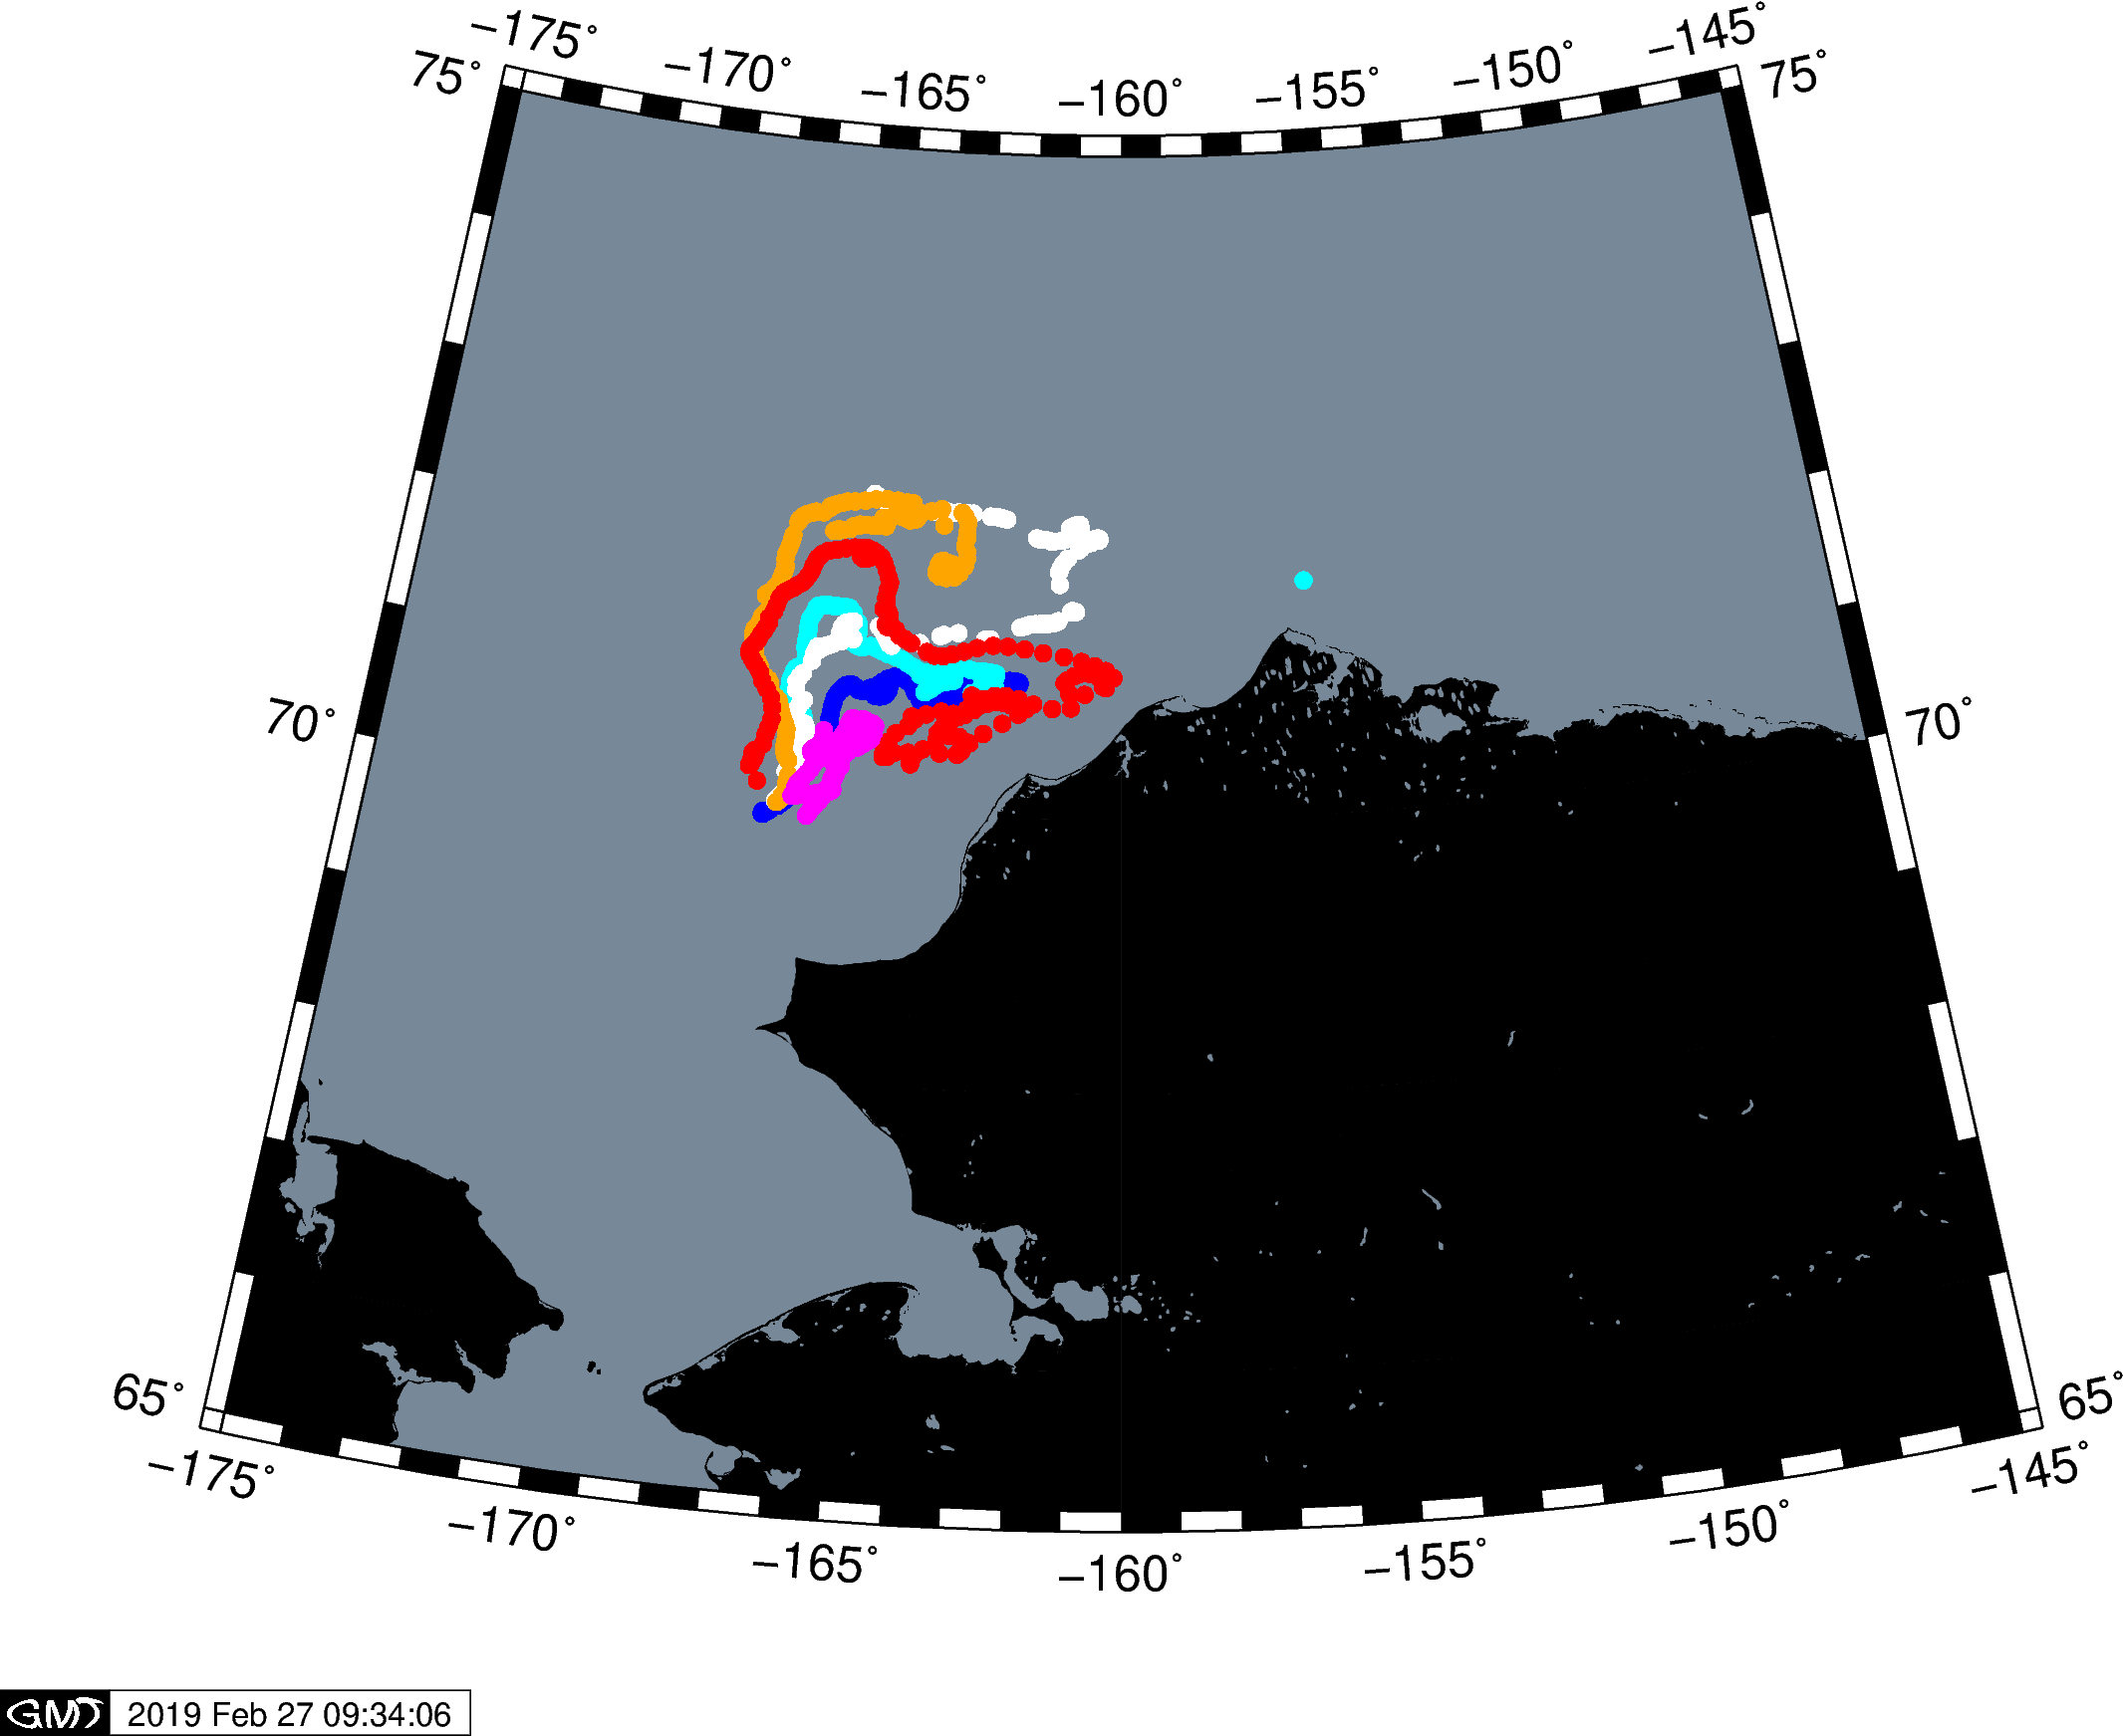

In [47]:
fig.show()

In [48]:
concat_ids = "_".join(AlamoID)
fig.savefig('ArcticAlamo_'+ concat_ids + '.png',dpi=300)